In [22]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv('../datasets/real_estate.csv')

In [3]:
df['Town'].value_counts()

Town
Bridgeport    36228
Stamford      34632
Waterbury     30710
Norwalk       25489
New Haven     22611
              ...  
Colebrook       559
Hartland        484
Canaan          471
Scotland        457
Union           284
Name: count, Length: 169, dtype: int64

In [4]:
df=df[df['Town']=='New Haven']

In [5]:
df=df.drop(columns='Unnamed: 0')

In [6]:
X=df[['List Year','Assessed Value','Sale Amount']]

In [7]:
Y=df['Sales Ratio']

In [8]:
pipe=Pipeline([('scale',StandardScaler()),('model',RandomForestRegressor())])

In [9]:
xtr,xte,ytr,yte=train_test_split(X,Y,test_size=0.2,random_state=42)

In [10]:
pipe.fit(xtr,ytr)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', RandomForestRegressor())])

In [11]:
yp=pipe.predict(xte)

In [12]:
mean_squared_error(yp,yte)

10.602354850047583

In [13]:
r2_score(yp,yte)

0.8170750020199349

In [14]:
params={
    'model__n_estimators':list(range(100,500,100)),
    'model__max_features': ['sqrt', 'log2'],
    'model__max_depth':list(range(1,16,2)),
    'model__min_samples_split':list(range(1,5)),
    'model__bootstrap': [True, False]
}

In [15]:
cv=GridSearchCV(pipe,param_grid=params,cv=5,scoring='r2',n_jobs=-1)

In [16]:
cv.fit(xtr,ytr)

c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
640 fits failed out of a total of 2560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__max_depth': [1, 3, 5, 7, 9, 11, 13, 15],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__min_samples_split': [1, 2, 3, 4],
                         'model__n_estimators': [100, 200, 300, 400]},
             scoring='r2')

In [17]:
print(cv.best_estimator_)

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 RandomForestRegressor(bootstrap=False, max_depth=13,
                                       max_features='log2'))])


In [18]:
print(cv.best_params_)

{'model__bootstrap': False, 'model__max_depth': 13, 'model__max_features': 'log2', 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [19]:
best_model=cv.best_estimator_

In [20]:
yp_b=best_model.predict(xte)

In [21]:
r2_score(yp_b,yte)

0.8906613688740299

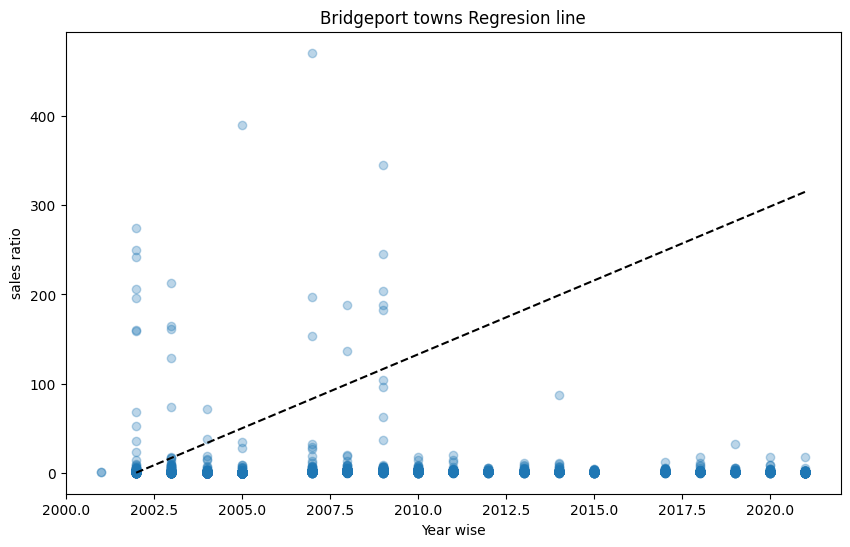

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(xtr.iloc[:, 0:1], ytr, alpha=0.3)
plt.plot([xte.iloc[:, 0:1].min(), xte.iloc[:, 0:1].max()], [yp.min(), yp.max()], 'k--')
plt.xlabel('Year wise')
plt.ylabel('sales ratio')
plt.title('New Hevean towns Regresion line')
plt.show()

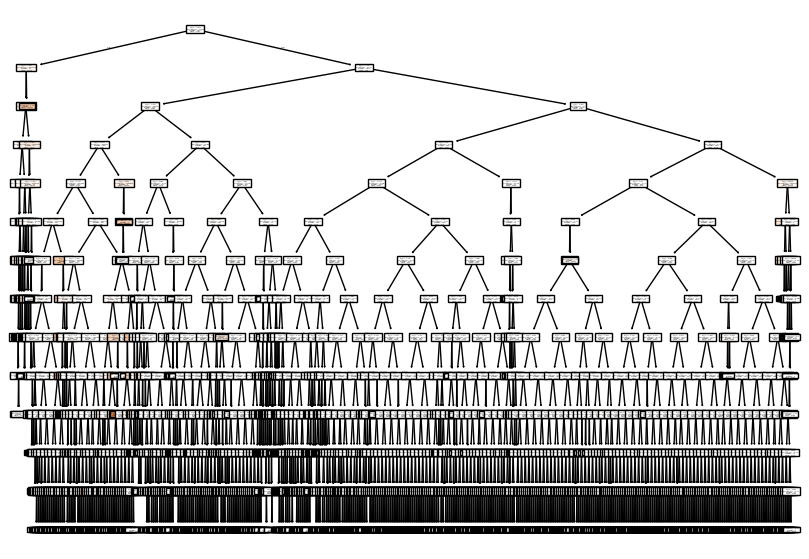

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(best_model['model'].estimators_[5],filled=True)
plt.show()